In [4]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\User\OneDrive\Documents\Trabajo\Henry\Proyecto Ind. 2\DataSet\Dataset_Limpio.csv')

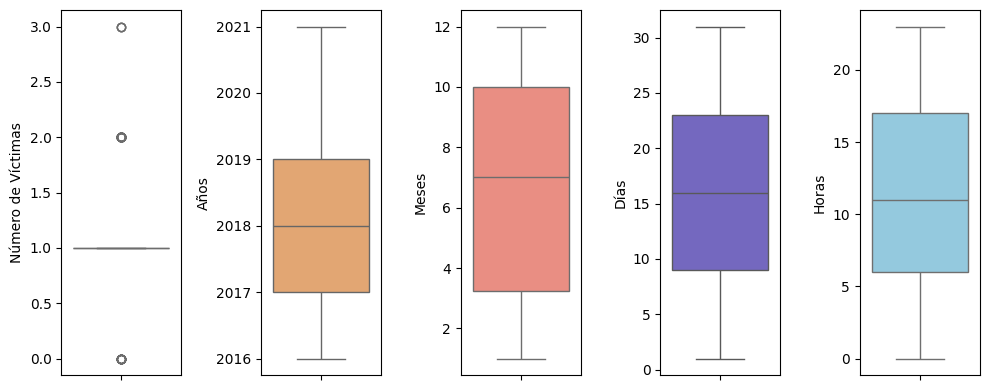

In [5]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 5, 1) 
sns.boxplot(data=df, y='Num víctimas', color = "#FA8072")
plt.ylabel('Número de Víctimas')

plt.subplot(1, 5, 2) 
sns.boxplot(data=df, y='Año', color = "#F4A460")
plt.ylabel('Años')

plt.subplot(1, 5, 3) 
sns.boxplot(data=df, y='Mes', color = "#FA8072")
plt.ylabel('Meses')

plt.subplot(1, 5, 4) 
sns.boxplot(data=df, y='Día', color = "#6A5ACD")
plt.ylabel('Días')

plt.subplot(1, 5, 5) 
sns.boxplot(data=df, y='Hora', color = "#87CEEB")
plt.ylabel('Horas')

plt.tight_layout()

plt.show()

**Conclusión:**
Los outliers en la feature "Num víctimas" (valores 2 o 3) se deben a que la mayoría de los registros tienen el valor 1, en cuanto a las víctimas en los siniestros.

In [6]:
df["Num víctimas"].describe()

count    717.000000
mean       1.037657
std        0.294226
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Num víctimas, dtype: float64

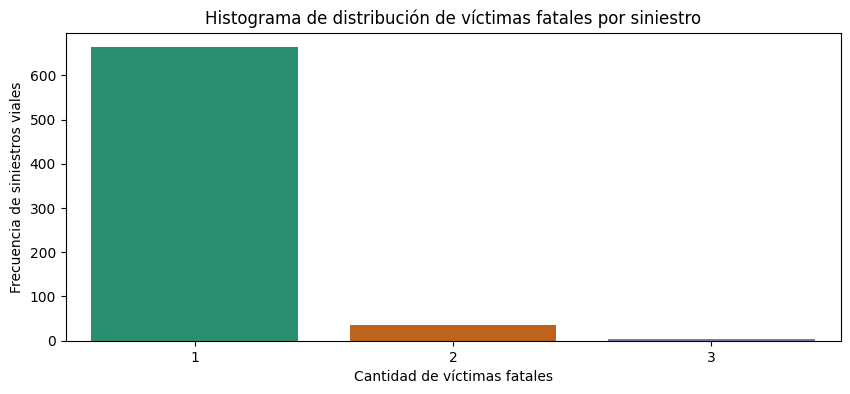

In [8]:
plt.figure(figsize=(10, 4))
df_filtrado = df[df["Num víctimas"] != 0]

sns.countplot(df_filtrado, x='Num víctimas', hue='Num víctimas', palette="Dark2", legend=False)
plt.ylabel("Frecuencia de siniestros viales")
plt.xlabel("Cantidad de víctimas fatales")
plt.title("Histograma de distribución de víctimas fatales por siniestro")

plt.show()

**Conclusión:**
La mayoría de los siniestros viales tienen 1 víctima fatal (75%). Según los datos, es raro que un siniestro tenga tres víctimas fatales.

In [9]:
rel_tiempo=df.groupby(['Año', 'Mes'])['Num víctimas'].sum().reset_index()
rel_tiempo["Año"]= rel_tiempo["Año"].astype("Int64")
rel_tiempo["Mes"]= rel_tiempo["Mes"].astype("Int64")

In [10]:
rel_tiempo

,Año,Mes,Num víctimas
0,2016,1,8
1,2016,2,12
2,2016,3,15
3,2016,4,9
4,2016,5,7
...,...,...,...
67,2021,8,9
68,2021,9,4
69,2021,10,5
70,2021,11,8


In [11]:
rel_tiempo["Fecha"] = rel_tiempo["Año"].astype(str) + '-' + rel_tiempo["Mes"].astype(str)
rel_tiempo["Fecha"] = pd.to_datetime(rel_tiempo["Fecha"])
rel_tiempo = rel_tiempo.sort_values("Fecha")

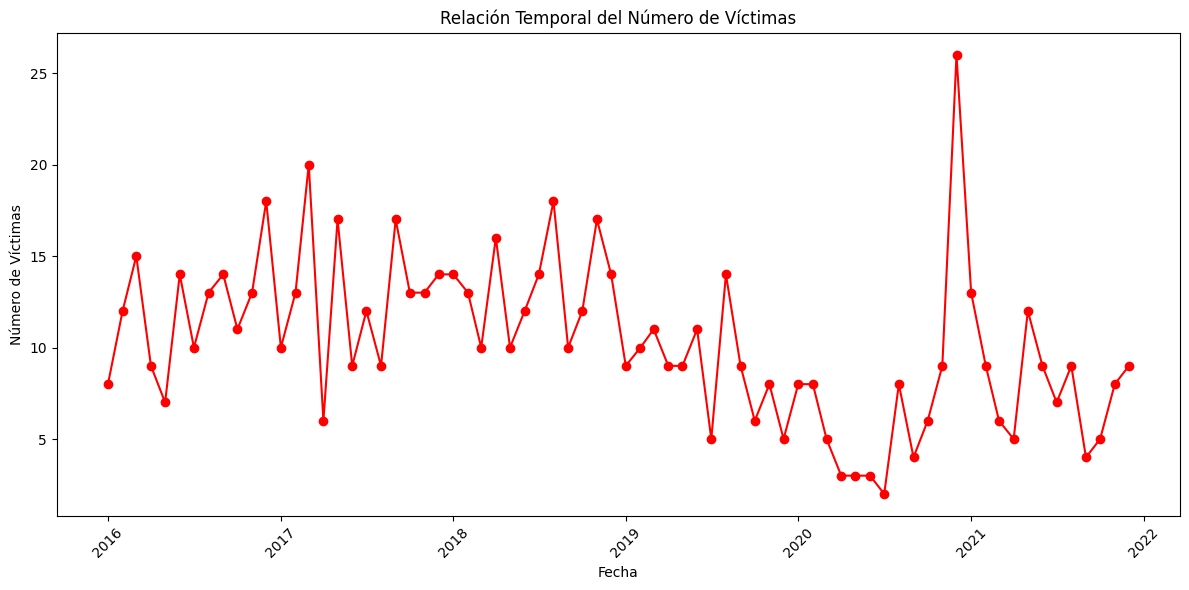

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(rel_tiempo["Fecha"], rel_tiempo["Num víctimas"], marker='o', color='red')

plt.title('Relación Temporal del Número de Víctimas')
plt.xlabel('Fecha')
plt.ylabel('Número de Víctimas')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusión:**
El gráfico temporal del número de víctimas muestra que los siniestros fatales fueron más frecuentes en 2017 y 2018, con una disminución sostenida en los años siguientes. Un pico notable ocurrió a finales de 2020, con 26 víctimas fatales, probablemente influenciado por la pandemia de COVID-19.

In [14]:
data = df.groupby(['Mes'])['Num víctimas'].sum().reset_index()
data["Mes"]=data["Mes"].astype("Int64")
data

,Mes,Num víctimas
0,1,62
1,2,65
2,3,67
3,4,48
4,5,58
5,6,58
6,7,50
7,8,71
8,9,58
9,10,53


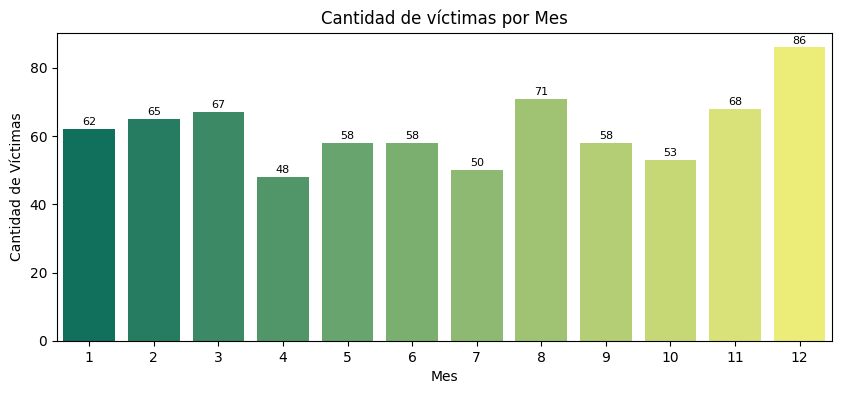

In [17]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Mes', y='Num víctimas', data=data, hue='Mes', palette="summer", legend=False)
ax.set_title('Cantidad de víctimas por Mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Cantidad de Víctimas')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

**Conclusion:** El gráfico muestra una tendencia variable en el número de víctimas por mes, con un pico significativo en diciembre. Esto podría indicar un factor estacional o un evento específico que condujo a un aumento en las víctimas durante ese mes.

In [18]:
data = df.groupby(['Día semana'])['Num víctimas'].sum().reset_index()
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
data['Orden_dia_semana'] = data['Día semana'].apply(lambda x: orden_dias_semana.index(x))
data = data.sort_values(by='Orden_dia_semana')

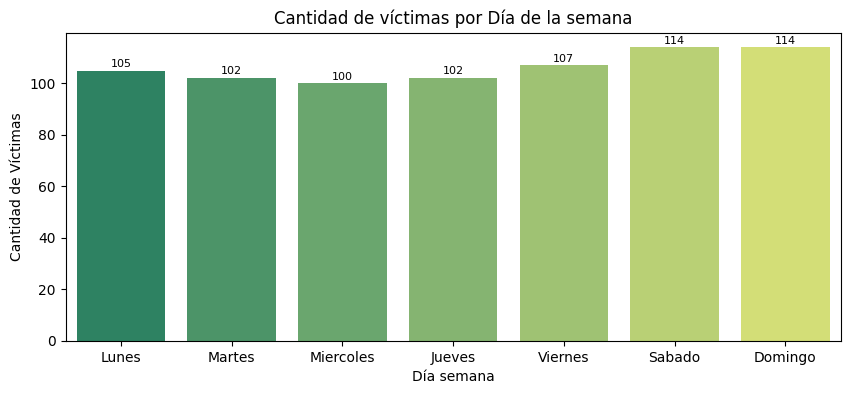

In [20]:
plt.figure(figsize=(10,4))

ax = sns.barplot(x='Día semana', y='Num víctimas', data=data, hue='Día semana', palette="summer", legend=False)
ax.set_title('Cantidad de víctimas por Día de la semana')
ax.set_xlabel('Día semana') ; ax.set_ylabel('Cantidad de Víctimas')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

**Conclusion:** El grafico muestra que los fines de semana hay un aumento en la cantidad de victimas fatales en accidentes de trafico, lo que puede estar relacionado con la mayor cantidad de viajes que se realizan en estos dias.

In [21]:
data = df.groupby(['Día semana', "Hora"])['Num víctimas'].sum().reset_index()
data["Hora"]=data["Hora"].astype("Int64")
orden_dias_semana = ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"]
data['Orden_dia_semana'] = data['Día semana'].apply(lambda x: orden_dias_semana.index(x))
data = data.sort_values(by='Orden_dia_semana')
pivot_data = data.pivot_table(index= 'Día semana', columns='Hora', values='Num víctimas', aggfunc='sum')
pivot_data = pivot_data.reindex(orden_dias_semana)

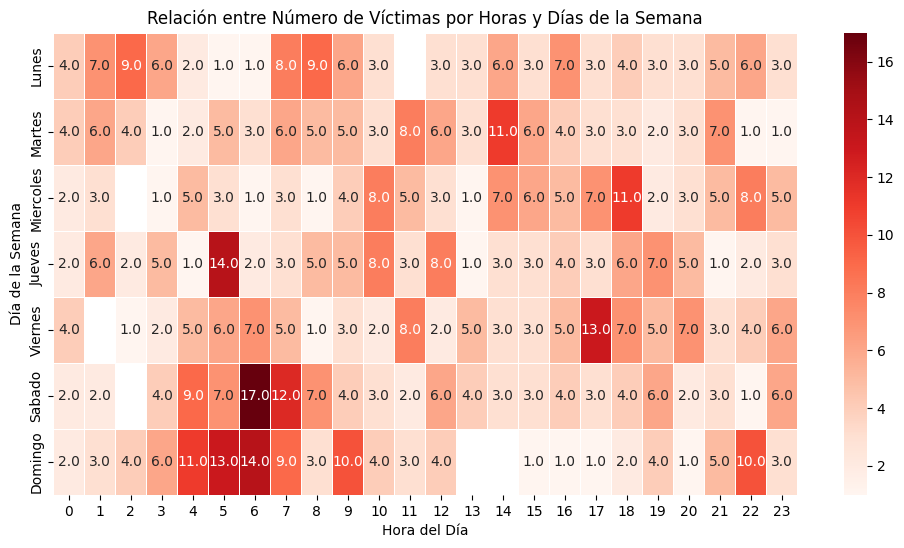

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_data, cmap='Reds', annot=True, fmt='.1f', linewidths=0.5)

plt.xlabel('Hora del Día')
plt.ylabel('Día de la Semana')
plt.title('Relación entre Número de Víctimas por Horas y Días de la Semana')

plt.show()

**Conclusion:** Recopilando los gráficos anteriores, podemos decir lo siguiente. 

1. Diciembre es el mes con más víctimas fatales. 
2. Los días Sábado y Domingo tienen un total de 114 víctimas fatales, siendo los días con más víctimas. 
3. El mapa de calor muestra que los fines de semana, especialmente los sábados y domingos, tienen más víctimas fatales, principalmente entre las 03:00 hs y las 09:00 hs. Los horarios más peligrosos coinciden con las horas de ingreso laboral (05:00 hs - 09:00 hs), mediodía (12:00 hs - 14:00 hs) y salida del trabajo (17:00 hs - 18:00 hs), con pocos siniestros durante la madrugada. Los fines de semana tienen menos siniestros pero con más víctimas.


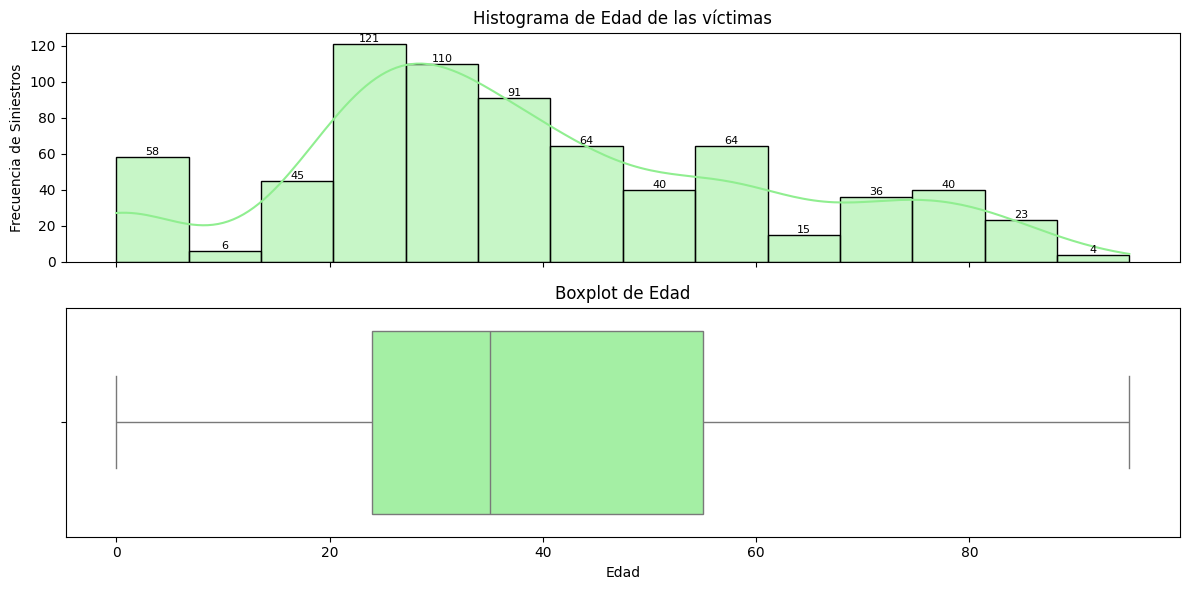

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

sns.histplot(df['Edad'], kde=True, ax=ax[0], color='lightgreen')
ax[0].set_title('Histograma de Edad de las víctimas') ; ax[0].set_ylabel('Frecuencia de Siniestros')

for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

sns.boxplot(x=df['Edad'], ax=ax[1], color='palegreen')
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

plt.tight_layout()
plt.show()

In [27]:
df['Edad'].describe()

count    717.000000
mean      39.050209
std       22.010669
min        0.000000
25%       24.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: Edad, dtype: float64

**Conclusion:** En general, el 75% de las víctimas fatales tienen menos de 55 años, con una mediana de 39 años. El histograma muestra que la mayoría de las víctimas fatales se concentran en el rango de edad de 20 a 40 años.

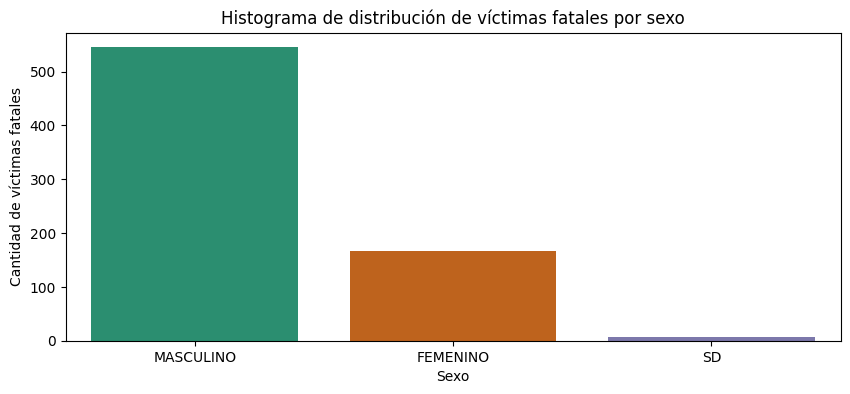

In [28]:
plt.figure(figsize=(10, 4))
df_filtrado = df[df["Sexo"] != 0]

sns.countplot(df_filtrado, x='Sexo',hue='Sexo', palette="Dark2", legend=False)

plt.ylabel("Cantidad de víctimas fatales")
plt.xlabel("Sexo")
plt.title("Histograma de distribución de víctimas fatales por sexo")

plt.show()

**Conclusión:** El gráfico muestra una clara diferencia en la cantidad de víctimas entre los sexos, siendo el masculino el más afectado en términos de cantidad.

In [29]:
Total_comuna=df.groupby(["Comuna", "Barrios"])["Num víctimas"].sum().reset_index()
Total_comuna=Total_comuna.sort_values(by="Num víctimas", ascending=False)
Total_comuna

,Comuna,Barrios,Num víctimas
0,Comuna 1,CONSTITUCION - MONTSERRAT - PUERTO MADERO - RE...,101
9,Comuna 4,BARRACAS - BOCA - NUEVA POMPEYA - PARQUE PATRI...,81
14,Comuna 9,LINIERS - MATADEROS - PARQUE AVELLANEDA,74
13,Comuna 8,VILLA LUGANO - VILLA RIACHUELO - VILLA SOLDATI,70
12,Comuna 7,FLORES - PARQUE CHACABUCO,65
8,Comuna 3,BALVANERA - SAN CRISTOBAL,48
6,Comuna 15,AGRONOMIA - CHACARITA - PARQUE CHAS - PATERN...,47
3,Comuna 12,COGHLAN - SAAVEDRA - VILLA PUEYRREDON - VILLA ...,43
4,Comuna 13,BELGRANO - COLEGIALES - NUÃ‘EZ,39
5,Comuna 14,PALERMO,38


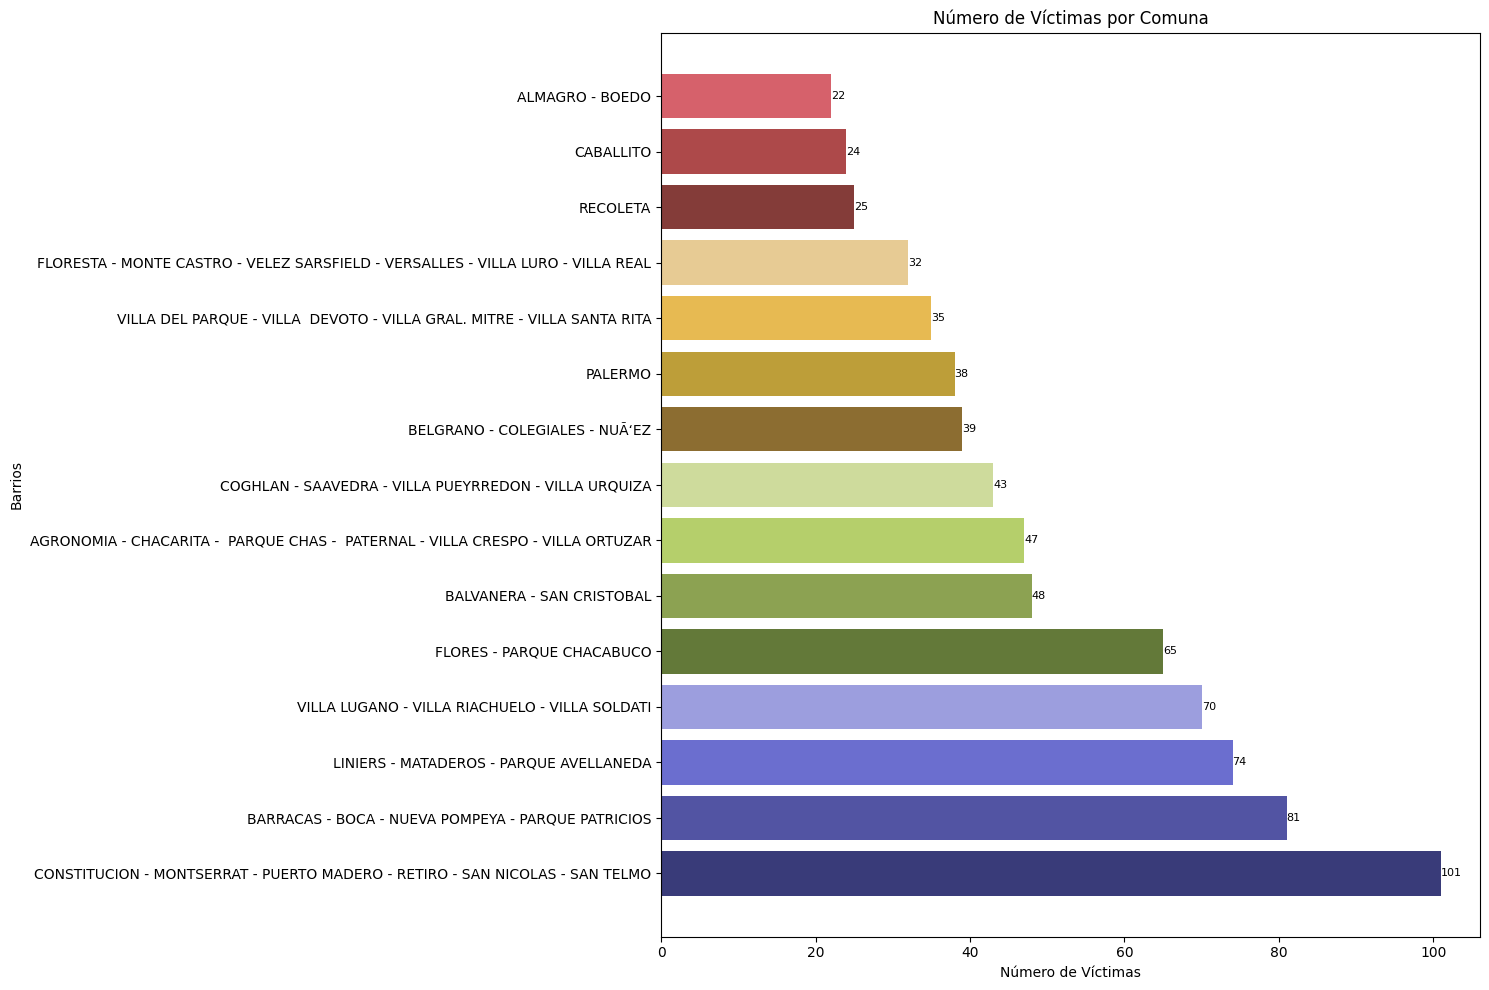

In [30]:
plt.figure(figsize=(15, 10))

colores = plt.cm.tab20b(range(len(Total_comuna)))

plt.barh(Total_comuna["Barrios"], Total_comuna["Num víctimas"], color=colores)

plt.xlabel('Número de Víctimas')
plt.ylabel('Barrios')

plt.title('Número de Víctimas por Comuna')

for i, v in enumerate(Total_comuna["Num víctimas"]):
    plt.text(v, i, str(v), va='center', fontsize=8, color='black')

plt.tight_layout()
plt.show()

**Conclusion:** El dataset incluye 15 comunas que abarcan varios barrios de la Ciudad Autónoma de Buenos Aires (CABA). Las comunas con mayor cantidad de víctimas fatales son la 1, 4, 9, 8 y 7, siendo la comuna 1 la que lidera con una diferencia de 20 víctimas sobre la comuna 4. Esto sugiere que estos barrios pueden tener arterias muy transitadas durante las horas de entrada y salida laboral.

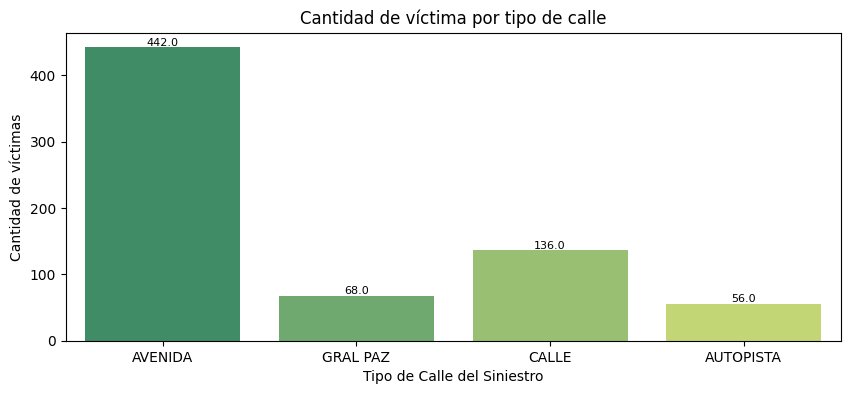

In [32]:
plt.figure(figsize=(10, 4))

ax=sns.countplot(df, x='Tipo de calle',hue='Tipo de calle', palette="summer", legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.xlabel('Tipo de Calle del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctima por tipo de calle')

plt.show()

**Conclusion:** El análisis del gráfico muestra que la mayoría de las víctimas fatales ocurren en avenidas, seguidas por las calles.

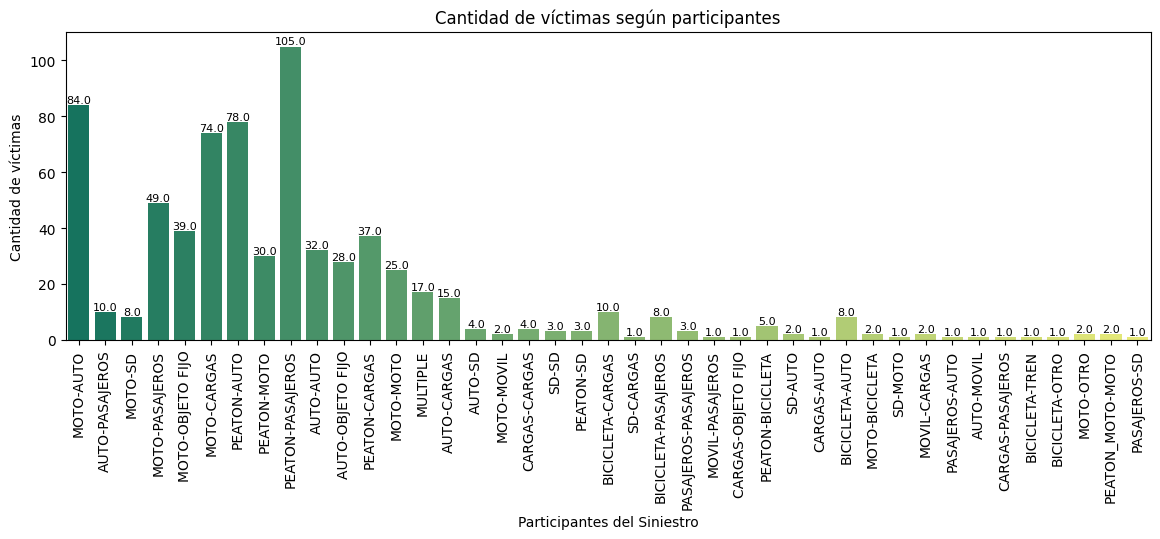

In [34]:
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Participantes", hue='Participantes', palette="summer", legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=90)

plt.xlabel('Participantes del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según participantes')

plt.show()

**Conclusion:** Según el diccionario de datos, los valores de participación que registran más víctimas se encuentran en la categoría de "Peatón-Pasajeros", donde "Peatón" se define como cualquier víctima que no sea ocupante de un vehículo, y "Pasajero" como cualquier persona dentro, descendiendo o ascendiendo de un transporte público u omnibús de larga distancia.
Le siguen en número de víctimas las categorías de "Moto-Auto", "Peatón-Auto" y "Moto-Cargas". En la columna de "Participantes", la primera palabra puede interpretarse como la víctima y la segunda como el acusado.

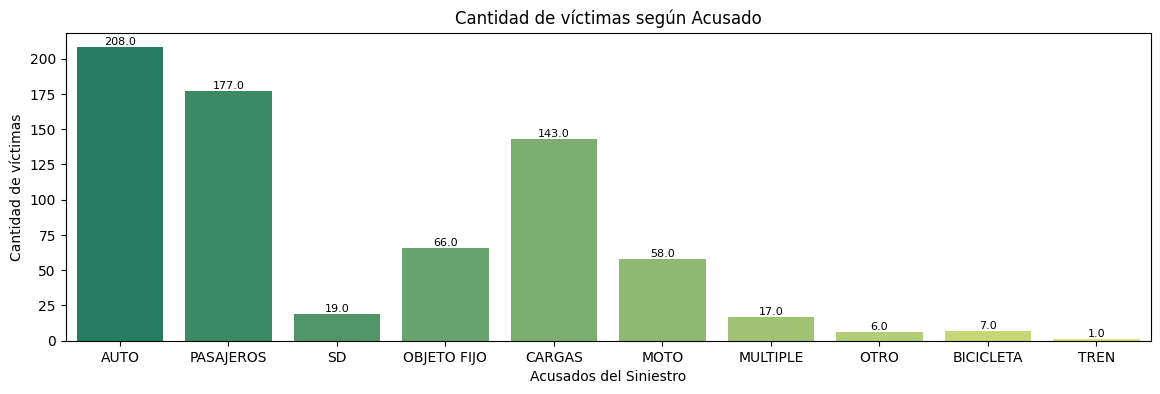

In [36]:
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Acusado", hue='Acusado', palette="summer", legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)


plt.xlabel('Acusados del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Cantidad de víctimas según Acusado')

plt.show()

**Conclusión:** Se observa que los vehículos que más víctimas causan son los autos, las cargas y los pasajeros, lo cual está relacionado con la información previamente analizada.

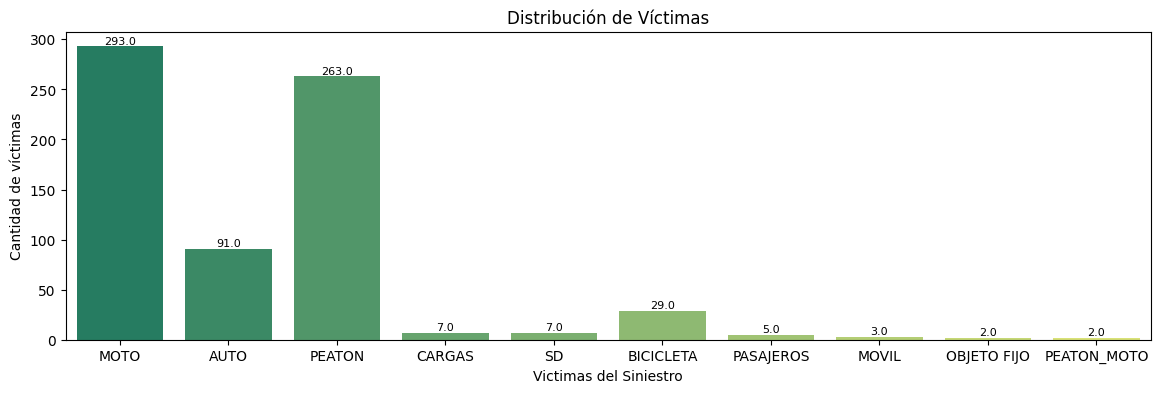

In [38]:
plt.figure(figsize=(14, 4))

ax=sns.countplot(df, x="Victima", hue='Victima', palette="summer", legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', fontsize=8)

plt.xlabel('Victimas del Siniestro')
plt.ylabel('Cantidad de víctimas')
plt.title('Distribución de Víctimas')

plt.show()

**Conclusion:** Se observa que las víctimas más frecuentes son motociclistas, peatones y ocupantes de vehículos de carga. Esta observación se relaciona con los dos puntos anteriores analizados.

**Conclusion:** El análisis revela que las motocicletas y los peatones son las principales víctimas de los siniestros, y que estos ocurren con mayor frecuencia en avenidas. Además, se destaca que la mayoría de las víctimas son de género masculino y que la comuna 1 es donde más siniestros se registran. Estos datos serán presentados de manera organizada en un dashboard para facilitar su comprensión.